In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
laptop = pd.read_csv('data/laptop.csv', encoding='latin-1')
laptop.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [3]:
laptop.drop("laptop_ID",axis=1,inplace=True)

In [4]:
laptop["TypeName"].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

In [5]:
laptop.drop(["Product","TypeName","ScreenResolution","OpSys","Weight"],axis=1,inplace=True)

In [6]:
laptop.head()

,Company,Inches,Cpu,Ram,Memory,Gpu,Price_euros
0,Apple,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,1339.69
1,Apple,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,898.94
2,HP,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,575.00
3,Apple,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,2537.45
4,Apple,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,1803.60


In [7]:
laptop["Price_inr"] = laptop["Price_euros"]*88.72;
laptop.head()

,Company,Inches,Cpu,Ram,Memory,Gpu,Price_euros,Price_inr
0,Apple,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,1339.69,118857.2968
1,Apple,13.3,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,898.94,79753.9568
2,HP,15.6,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,575.00,51014.0000
3,Apple,15.4,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,2537.45,225122.5640
4,Apple,13.3,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,1803.60,160015.3920


In [8]:
laptop["Ram"] = laptop["Ram"].str.replace("GB","")
laptop["Ram"]

0        8
1        8
2        8
3       16
4        8
        ..
1298     4
1299    16
1300     2
1301     6
1302     4
Name: Ram, Length: 1303, dtype: object

In [9]:
def get_freq(x):
    freq = x.split(' ')[-1]
    return freq

In [10]:
laptop['GPU_GHz'] = laptop["Cpu"].apply(get_freq)

In [11]:
laptop.Ram = pd.to_numeric(laptop["Ram"])

In [12]:
laptop.head()

,Company,Inches,Cpu,Ram,Memory,Gpu,Price_euros,Price_inr,GPU_GHz
0,Apple,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,1339.69,118857.2968,2.3GHz
1,Apple,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,898.94,79753.9568,1.8GHz
2,HP,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,575.00,51014.0000,2.5GHz
3,Apple,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,2537.45,225122.5640,2.7GHz
4,Apple,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,1803.60,160015.3920,3.1GHz


In [13]:
laptop["Cpu_company"] = laptop["Cpu"].apply(lambda x: x.split(' ')[0])

In [14]:
laptop['Cpu_model']=laptop['Cpu'].str.split(' ', 1, expand=True)[1].apply(lambda x: x.split(' ')[1] if x.split(' ')[0]=='Core' else x.split(' ')[0])

In [15]:
laptop.head()

,Company,Inches,Cpu,Ram,Memory,Gpu,Price_euros,Price_inr,GPU_GHz,Cpu_company,Cpu_model
0,Apple,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,1339.69,118857.2968,2.3GHz,Intel,i5
1,Apple,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,898.94,79753.9568,1.8GHz,Intel,i5
2,HP,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,575.00,51014.0000,2.5GHz,Intel,i5
3,Apple,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,2537.45,225122.5640,2.7GHz,Intel,i7
4,Apple,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,1803.60,160015.3920,3.1GHz,Intel,i5


In [16]:
laptop.drop(["Cpu","Gpu"],axis=1,inplace=True)

In [17]:
laptop.head()

,Company,Inches,Ram,Memory,Price_euros,Price_inr,GPU_GHz,Cpu_company,Cpu_model
0,Apple,13.3,8,128GB SSD,1339.69,118857.2968,2.3GHz,Intel,i5
1,Apple,13.3,8,128GB Flash Storage,898.94,79753.9568,1.8GHz,Intel,i5
2,HP,15.6,8,256GB SSD,575.00,51014.0000,2.5GHz,Intel,i5
3,Apple,15.4,16,512GB SSD,2537.45,225122.5640,2.7GHz,Intel,i7
4,Apple,13.3,8,256GB SSD,1803.60,160015.3920,3.1GHz,Intel,i5


In [18]:
laptop['GPU_GHz'] = laptop['GPU_GHz'].apply(lambda x:x.replace('GHz',''))

In [19]:
laptop['GPU_GHz'] = pd.to_numeric(laptop['GPU_GHz'])

In [20]:
laptop.head()

,Company,Inches,Ram,Memory,Price_euros,Price_inr,GPU_GHz,Cpu_company,Cpu_model
0,Apple,13.3,8,128GB SSD,1339.69,118857.2968,2.3,Intel,i5
1,Apple,13.3,8,128GB Flash Storage,898.94,79753.9568,1.8,Intel,i5
2,HP,15.6,8,256GB SSD,575.00,51014.0000,2.5,Intel,i5
3,Apple,15.4,16,512GB SSD,2537.45,225122.5640,2.7,Intel,i7
4,Apple,13.3,8,256GB SSD,1803.60,160015.3920,3.1,Intel,i5


In [21]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   Inches       1303 non-null   float64
 2   Ram          1303 non-null   int64  
 3   Memory       1303 non-null   object 
 4   Price_euros  1303 non-null   float64
 5   Price_inr    1303 non-null   float64
 6   GPU_GHz      1303 non-null   float64
 7   Cpu_company  1303 non-null   object 
 8   Cpu_model    1303 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 91.7+ KB


In [22]:
laptop["Memory"].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [23]:
def memory_type():
    col=[]
    for row in laptop["Memory"]:
        if (row.find("SSD")>=0 and row.find("HDD")>=0):
            col.append("Both")
        elif row.find("SSD")>=0:
            col.append("SSD")
        elif row.find("HDD")>=0:
            col.append("HDD")
        else:
            col.append("Others")
    return col
            

In [24]:
memory_col = memory_type()

In [25]:
len(memory_col)

1303

In [26]:
laptop["Memory_type"] = memory_col

In [27]:
laptop[laptop.Memory_type=="Others"]

,Company,Inches,Ram,Memory,Price_euros,Price_inr,GPU_GHz,Cpu_company,Cpu_model,Memory_type
1,Apple,13.3,8,128GB Flash Storage,898.94,79753.9568,1.80,Intel,i5,Others
6,Apple,15.4,16,256GB Flash Storage,2139.97,189858.1384,2.20,Intel,i7,Others
7,Apple,13.3,8,256GB Flash Storage,1158.70,102799.8640,1.80,Intel,i5,Others
20,Asus,11.6,2,32GB Flash Storage,191.90,17025.3680,1.44,Intel,Atom,Others
26,Apple,13.3,8,128GB Flash Storage,1099.00,97503.2800,1.60,Intel,i5,Others
...,...,...,...,...,...,...,...,...,...,...
1282,HP,11.6,2,32GB Flash Storage,209.00,18542.4800,1.60,Intel,Celeron,Others
1286,Lenovo,14.0,2,64GB Flash Storage,229.00,20316.8800,1.60,Intel,Celeron,Others
1294,HP,15.6,6,1.0TB Hybrid,549.99,48795.1128,2.90,AMD,A9-Series,Others
1296,HP,11.6,2,32GB Flash Storage,209.00,18542.4800,1.60,Intel,Celeron,Others


In [28]:
corr_matrix = laptop.drop('Price_euros',axis=1).corr()

In [29]:
corr_matrix

,Inches,Ram,Price_inr,GPU_GHz
Inches,1.000000,0.237993,0.068197,0.307870
Ram,0.237993,1.000000,0.743007,0.368000
Price_inr,0.068197,0.743007,1.000000,0.430293
GPU_GHz,0.307870,0.368000,0.430293,1.000000


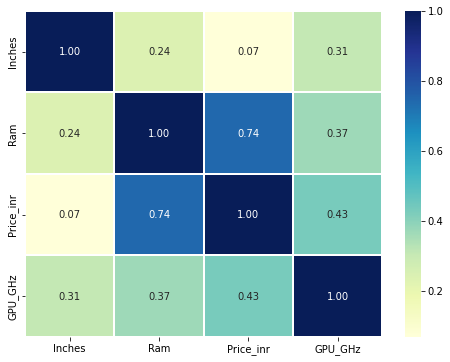

In [30]:
fig,ax = plt.subplots(figsize=(8,6))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidth=0.2,
                 fmt='.2f',
                 cmap="YlGnBu")

In [31]:
laptop.Company.value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [32]:
def get_ave_brand_cost():
    ans = {}
    for brand in laptop["Company"]:
        df = laptop[laptop["Company"]==brand]
        ans[brand]=df["Price_inr"].mean()
    return ans

In [33]:
company_mean = get_ave_brand_cost()

In [34]:
company_mean

{'Apple': 138775.69725714283,
 'HP': 94732.98504817518,
 'Acer': 55607.55121553399,
 'Asus': 97961.90624810128,
 'Dell': 105228.0407838384,
 'Lenovo': 96384.02791111112,
 'Chuwi': 27884.400266666664,
 'MSI': 153388.7309037037,
 'Microsoft': 143043.99533333333,
 'Toshiba': 112480.325,
 'Huawei': 126337.28,
 'Xiaomi': 100560.793,
 'Vero': 19289.946,
 'Razer': 296869.79428571434,
 'Mediacom': 26172.399999999994,
 'Samsung': 125400.79111111112,
 'Google': 148842.58666666667,
 'Fujitsu': 64676.88,
 'LG': 186223.28}

* The average cost is very much dependent on the companies as well

In [35]:
laptop.head()

,Company,Inches,Ram,Memory,Price_euros,Price_inr,GPU_GHz,Cpu_company,Cpu_model,Memory_type
0,Apple,13.3,8,128GB SSD,1339.69,118857.2968,2.3,Intel,i5,SSD
1,Apple,13.3,8,128GB Flash Storage,898.94,79753.9568,1.8,Intel,i5,Others
2,HP,15.6,8,256GB SSD,575.00,51014.0000,2.5,Intel,i5,SSD
3,Apple,15.4,16,512GB SSD,2537.45,225122.5640,2.7,Intel,i7,SSD
4,Apple,13.3,8,256GB SSD,1803.60,160015.3920,3.1,Intel,i5,SSD


In [36]:
laptop.drop(["Price_euros","Memory"],axis=1,inplace=True)

In [37]:
laptop.head()

,Company,Inches,Ram,Price_inr,GPU_GHz,Cpu_company,Cpu_model,Memory_type
0,Apple,13.3,8,118857.2968,2.3,Intel,i5,SSD
1,Apple,13.3,8,79753.9568,1.8,Intel,i5,Others
2,HP,15.6,8,51014.0000,2.5,Intel,i5,SSD
3,Apple,15.4,16,225122.5640,2.7,Intel,i7,SSD
4,Apple,13.3,8,160015.3920,3.1,Intel,i5,SSD


In [38]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_inches = le.fit_transform(laptop["Inches"])
y_inches

array([ 7,  7, 14, ..., 10, 14, 14], dtype=int64)

In [39]:
len(y_inches)

1303

In [40]:
laptop["Price_inr"] = le.fit_transform(laptop["Price_inr"])
laptop.head()

,Company,Inches,Ram,Price_inr,GPU_GHz,Cpu_company,Cpu_model,Memory_type
0,Apple,13.3,8,524,2.3,Intel,i5,SSD
1,Apple,13.3,8,342,1.8,Intel,i5,Others
2,HP,15.6,8,168,2.5,Intel,i5,SSD
3,Apple,15.4,16,745,2.7,Intel,i7,SSD
4,Apple,13.3,8,637,3.1,Intel,i5,SSD


In [41]:
laptop["Inches"] = y_inches

In [42]:
laptop.head()

,Company,Inches,Ram,Price_inr,GPU_GHz,Cpu_company,Cpu_model,Memory_type
0,Apple,7,8,524,2.3,Intel,i5,SSD
1,Apple,7,8,342,1.8,Intel,i5,Others
2,HP,14,8,168,2.5,Intel,i5,SSD
3,Apple,13,16,745,2.7,Intel,i7,SSD
4,Apple,7,8,637,3.1,Intel,i5,SSD


In [43]:
laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1303 non-null   object 
 1   Inches       1303 non-null   int64  
 2   Ram          1303 non-null   int64  
 3   Price_inr    1303 non-null   int64  
 4   GPU_GHz      1303 non-null   float64
 5   Cpu_company  1303 non-null   object 
 6   Cpu_model    1303 non-null   object 
 7   Memory_type  1303 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 81.6+ KB


In [44]:
laptop_dummies = pd.get_dummies(laptop,["Company","Cpu_company","Cpu_model","Memory_type"])

In [45]:
X = laptop_dummies.drop("Price_inr",axis=1)
y = laptop_dummies["Price_inr"]

#### Escaping from dummy variable trap

In [46]:
laptop_dummies_1 = laptop_dummies.drop(["Company_Acer","Company_Acer","Cpu_model_Pentium","Memory_type_Both"],axis=1)

In [47]:
laptop_dummies_1.head()

,Inches,Ram,Price_inr,GPU_GHz,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,Company_Google,...,Cpu_model_FX,Cpu_model_M,Cpu_model_Ryzen,Cpu_model_Xeon,Cpu_model_i3,Cpu_model_i5,Cpu_model_i7,Memory_type_HDD,Memory_type_Others,Memory_type_SSD
0,7,8,524,2.3,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,7,8,342,1.8,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,14,8,168,2.5,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,13,16,745,2.7,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,7,8,637,3.1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [48]:
from sklearn.model_selection import train_test_split
X_tr,X_te,y_tr,y_te = train_test_split(laptop_dummies_1.drop("Price_inr",axis=1),laptop_dummies_1["Price_inr"],random_state=42,test_size=0.25)

In [49]:
from sklearn.ensemble import RandomForestRegressor

In [50]:
rf_reg_2 = RandomForestRegressor(n_estimators=111)
rf_reg_2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 111,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [51]:
rf_reg_2.fit(X_tr,y_tr)

RandomForestRegressor(n_estimators=111)

In [52]:
rf_reg_2.score(X_te,y_te)

0.8138141059241988

In [53]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(rf_reg_2,laptop_dummies_1.drop("Price_inr",axis=1),laptop_dummies_1["Price_inr"],cv=6)
cv_score

array([0.74912842, 0.77596315, 0.82155022, 0.79633611, 0.74834294,
       0.84335307])

In [54]:
cv_score.mean()

0.7891123183806256

Experimenting with Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [56]:
lr.fit(X_tr,y_tr)

LinearRegression()

In [57]:
lr.score(X_te,y_te)

0.7494690787048512

## Therefore Random Forest Regressor performs very well on this dataset with an accuracy of 81.1%